In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.lines import Line2D
from matplotlib.patheffects import withStroke

In [2]:
#importing data retrieval libraries for reading stock data

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

sns.set_style('whitegrid')

In [3]:
tech_list = ['AAPL', 'GOOG','MSFT','TSLA']

#start and end dates for retreiving stock data

end = datetime.now()
start = datetime(end.year-1, end.month,end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
company_list = [AAPL,GOOG,MSFT,TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT","TESLA"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list,axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-22,169.690002,169.860001,167.139999,167.570007,166.581772,69026800,APPLE
2022-08-23,167.080002,168.710007,166.649994,167.229996,166.243759,54147100,APPLE
2022-08-24,167.320007,168.110001,166.250000,167.529999,166.542007,53841500,APPLE
2022-08-25,168.779999,170.139999,168.350006,170.029999,169.027283,51218200,APPLE
2022-08-26,170.570007,171.050003,163.559998,163.619995,162.655045,78961000,APPLE
...,...,...,...,...,...,...,...
2023-08-14,235.699997,240.660004,233.750000,239.759995,239.759995,98595300,TESLA
2023-08-15,238.729996,240.500000,232.610001,232.960007,232.960007,88197600,TESLA
2023-08-16,228.020004,233.970001,225.380005,225.600006,225.600006,112484500,TESLA


### Open: The opening price of the stock for a particular period (e.g., day, hour, etc.). It is the price at which the stock's first trade occurred during that period.

### High: The highest price at which the stock traded during the same period. It represents the maximum price reached during the trading period.

### Low: The lowest price at which the stock traded during the same period. It represents the minimum price reached during the trading period.

### Adj Close (Adjusted Close): The closing price of the stock, adjusted for factors such as dividends, stock splits, and other corporate actions. This price is often used for historical comparisons.

### Close: The closing price of the stock for the given period. It is the price at which the stock's last trade occurred during that period.

### Volume: The total number of shares (or units) of the stock that were traded during the given period. It indicates the level of market activity and liquidity.

In [5]:
apple_summary = AAPL.describe()
apple_summary

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,159.361481,161.117520,157.736840,159.463160,158.944861,7.026196e+07
std,18.328944,18.074844,18.592876,18.297190,18.448403,2.374036e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.812500,147.320004,143.957497,145.915001,145.256302,5.205060e+07
50%,154.719994,156.915001,153.360001,154.824997,154.193527,6.568655e+07
75%,173.110004,174.240002,171.945004,173.567505,173.094017,8.141450e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


## 1. Analysing Closing Price

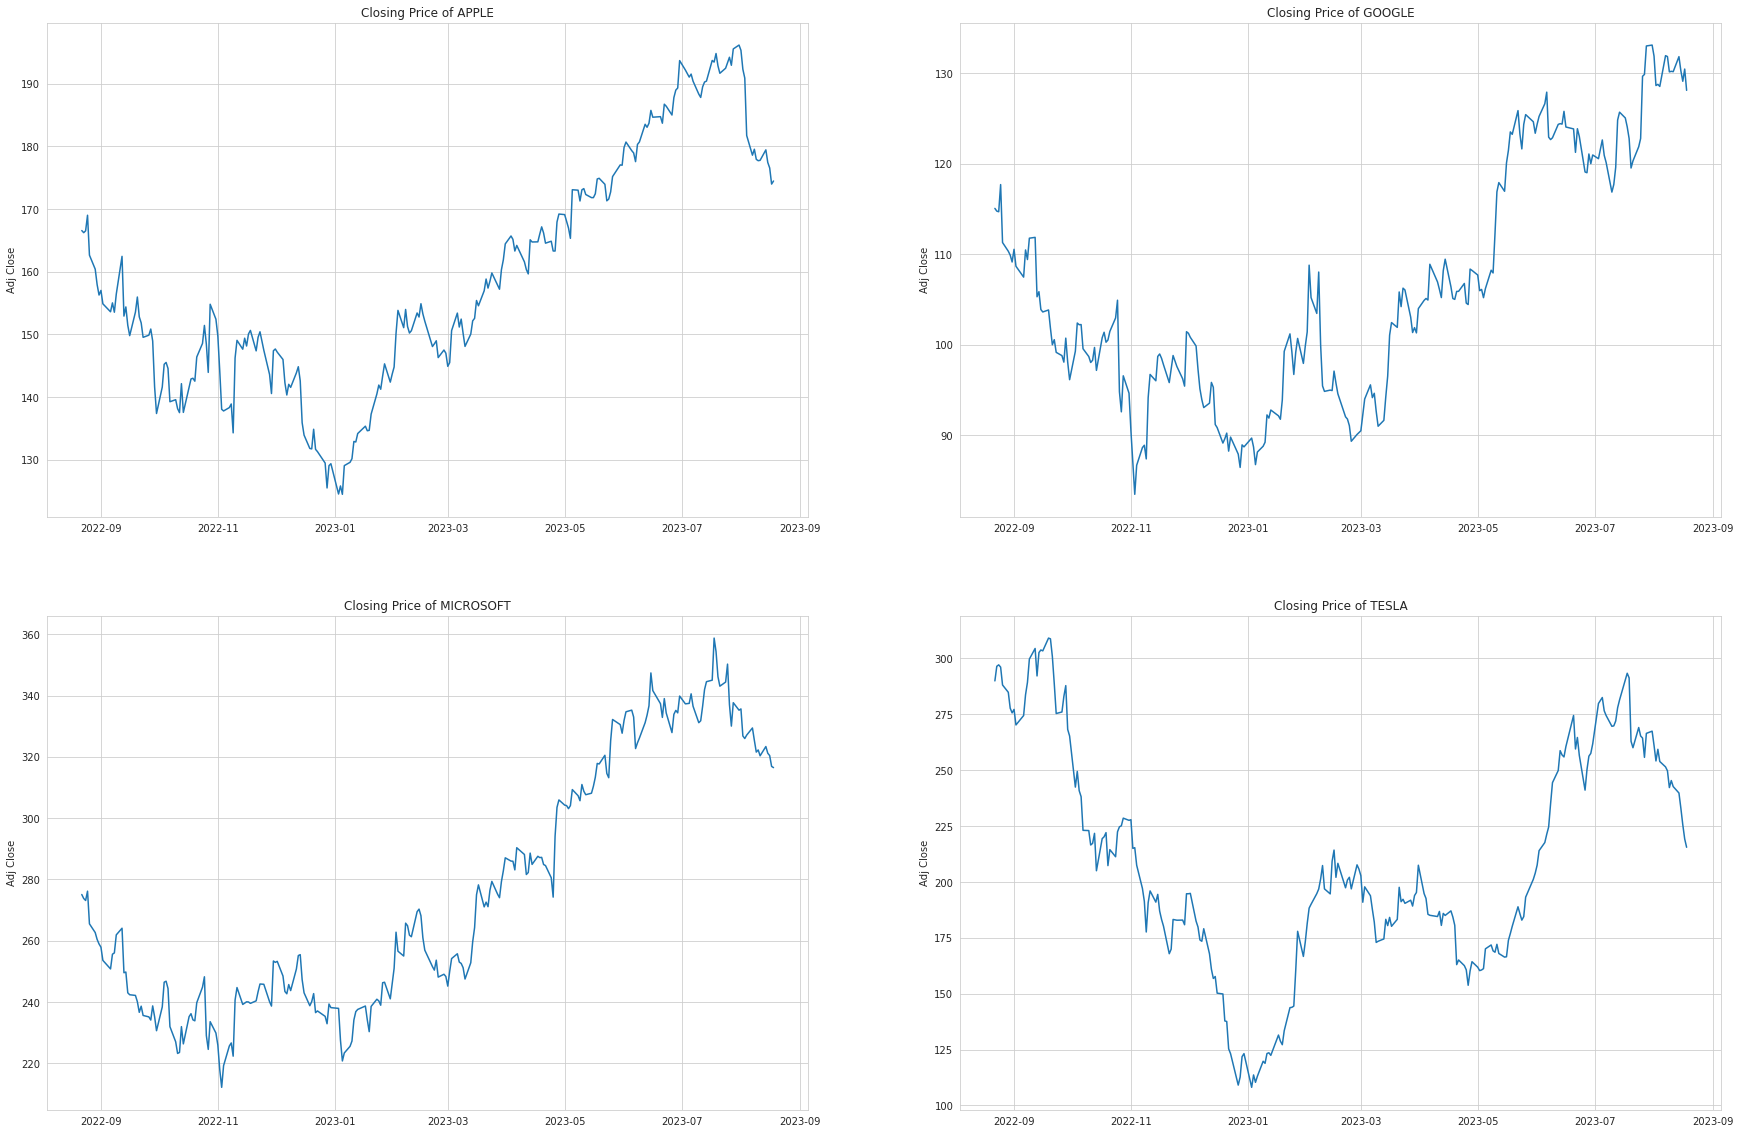

In [10]:
plt.figure(figsize=(30, 20))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=company, x=company.index, y='Adj Close')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
#plt.tight_layout()

## 2. Volume 
### No. of shares of a particular company traded between open and close

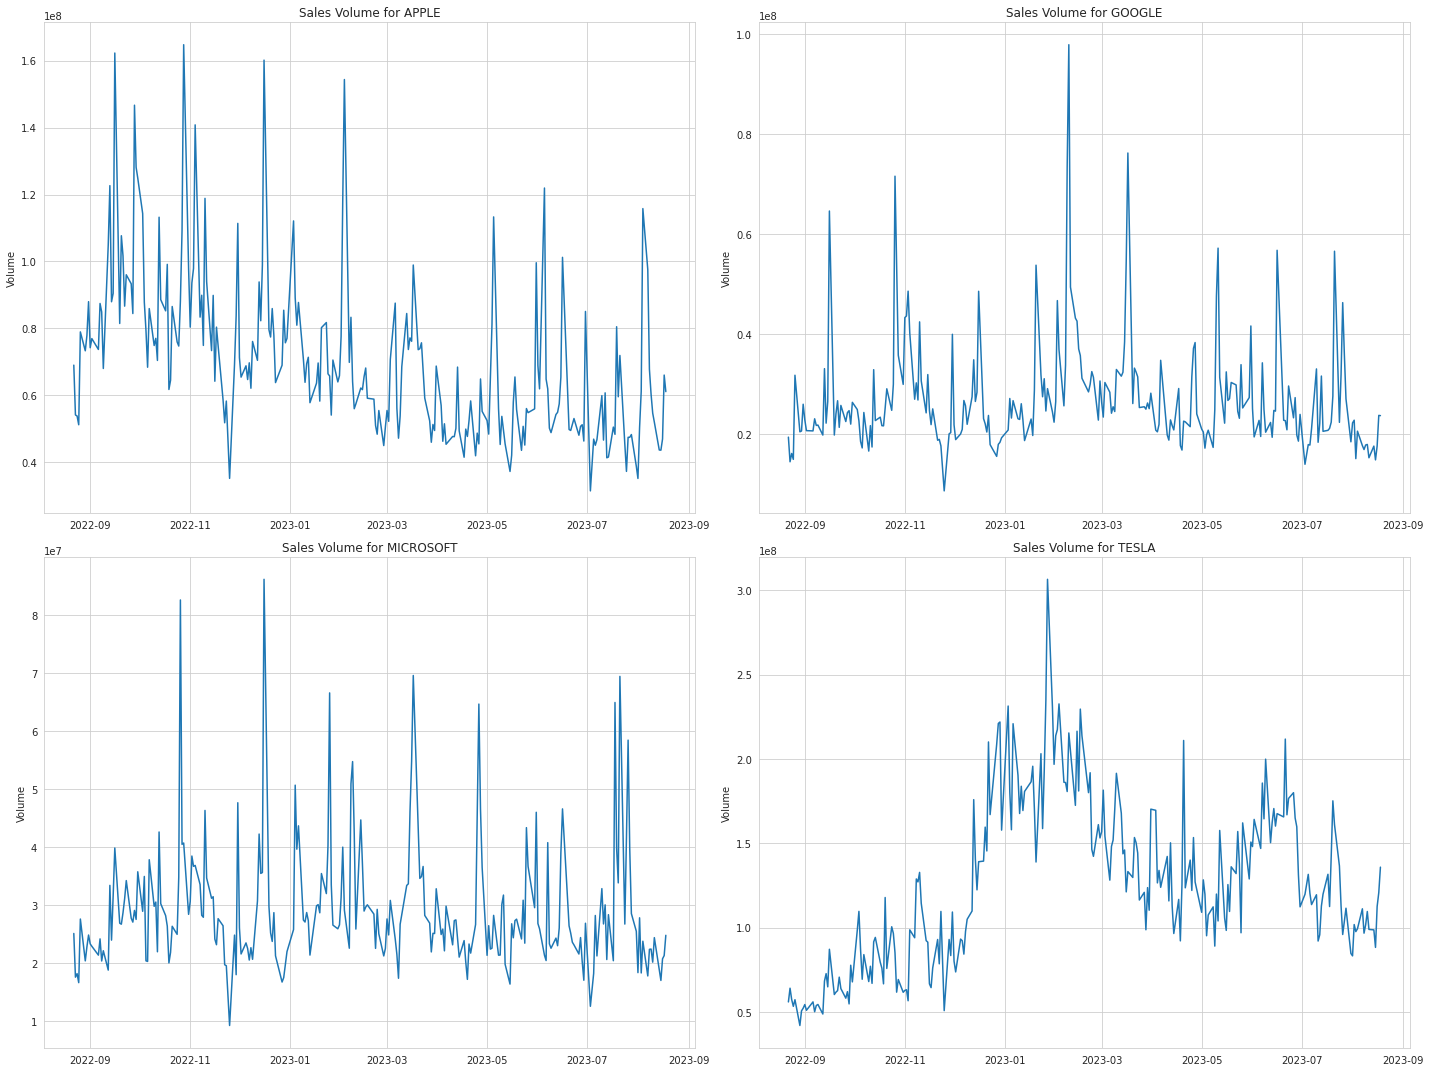

In [12]:
plt.figure(figsize=(20, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=company, x=company.index, y='Volume')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

## 3. Calculating moving average of the stock

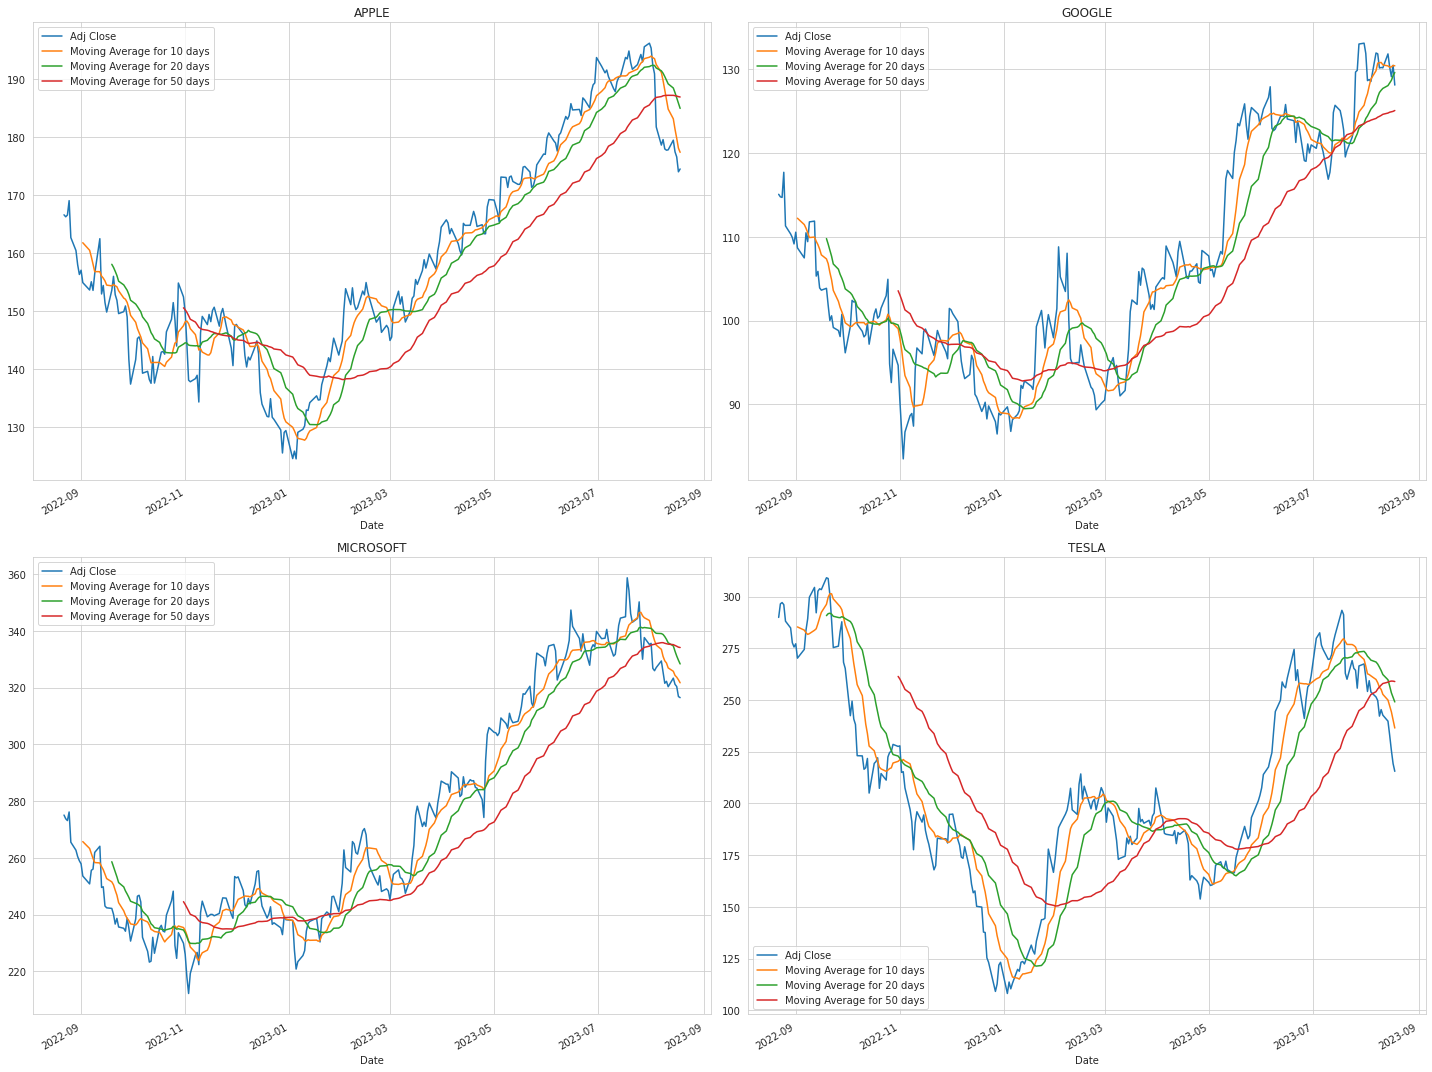

In [23]:
## Say we calculate it for 10, 20 and 100 days
days = [10,20,50]

for day in days:
    for company in company_list:
        column_name = f"Moving Average for {day} days"
        company[column_name] = company['Adj Close'].rolling(day).mean()
        

        
companies = [AAPL, GOOG, MSFT, TSLA]
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'TESLA']
metrics = ['Adj Close', 'Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for i, (company, name) in enumerate(zip(companies, company_names)):
    row = i // 2
    col = i % 2
    company[metrics].plot(ax=axes[row, col])
    axes[row, col].set_title(name)

fig.tight_layout()
plt.show()


## 4. Daily Return of the Stock on Average

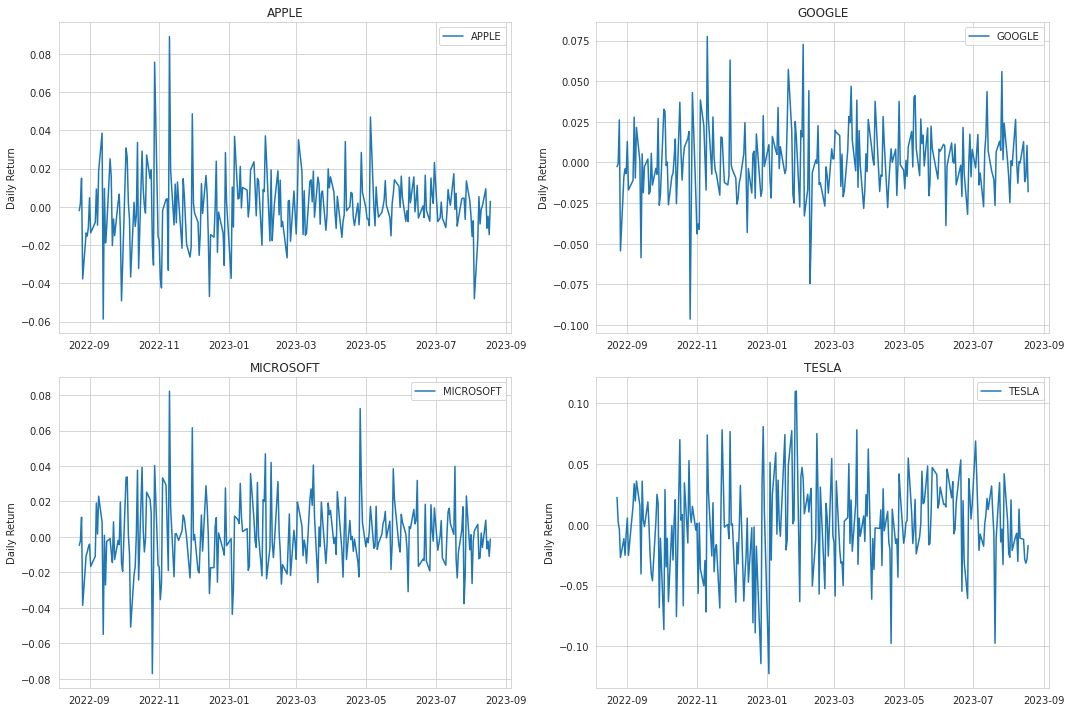

In [32]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create a line plot using seaborn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (company, name) in enumerate(zip(company_list, company_names)):
    row = i // 2
    col = i % 2
    sns.lineplot(data=company, x=company.index, y='Daily Return', ax=axes[row, col], label=name)
    axes[row, col].set_title(name)
    axes[row, col].set_xlabel(None)

plt.tight_layout()
plt.show()

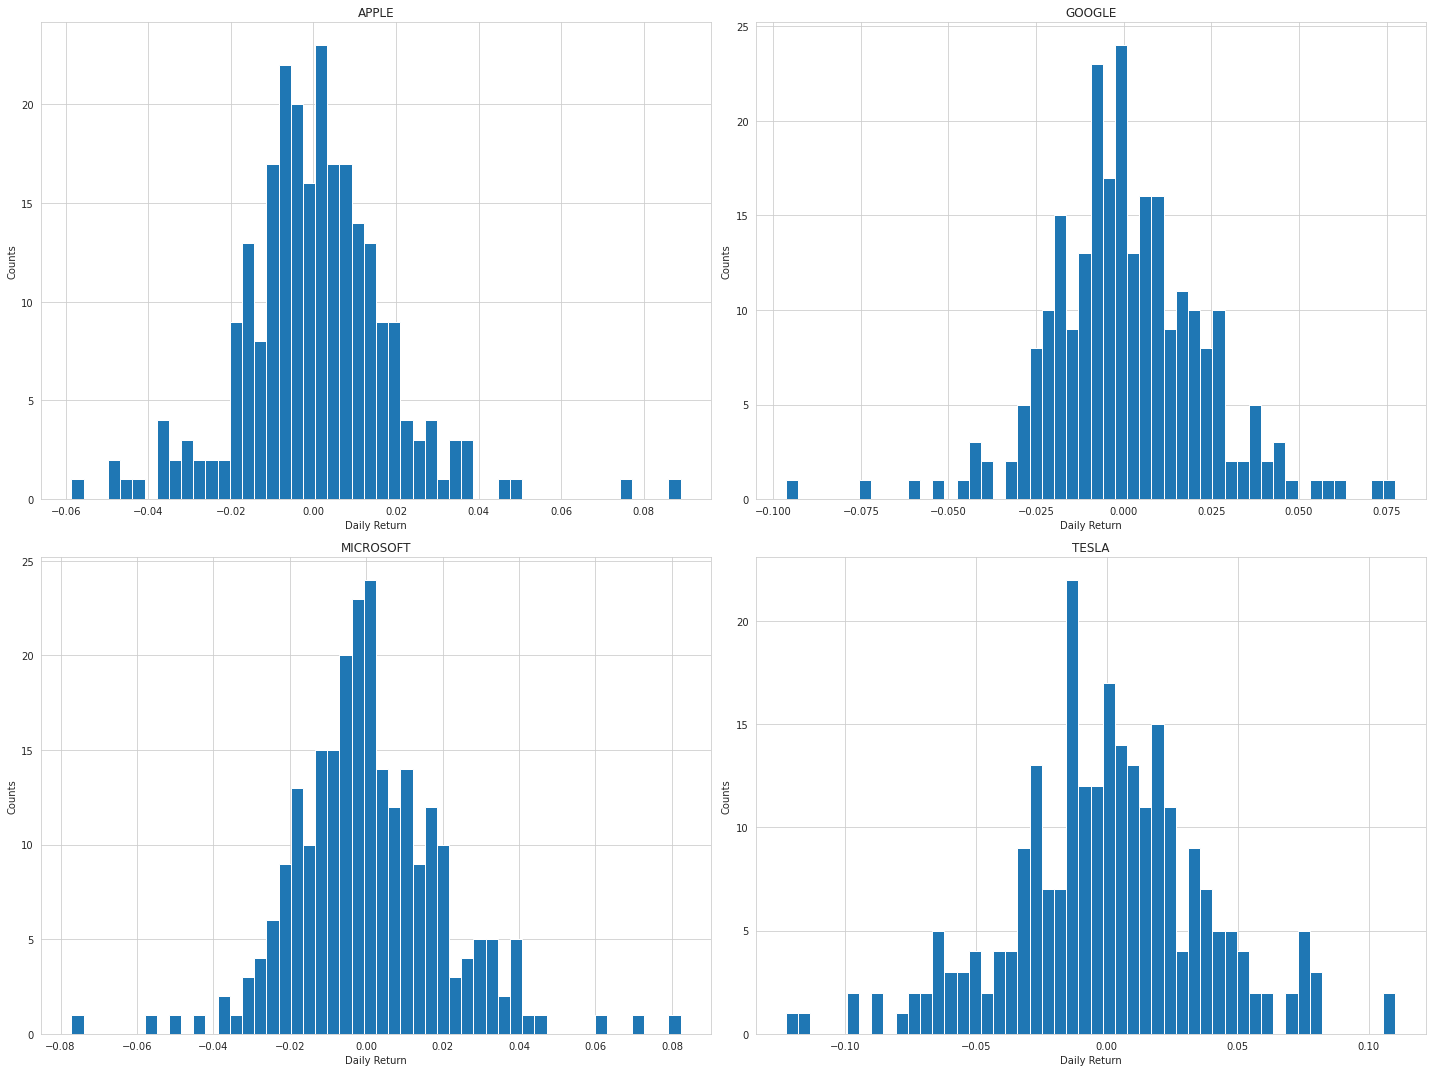

In [33]:
plt.figure(figsize=(20,15))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()